CAR PRICE PREDICTION

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

Data Collection Phase

You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. more the data better the model
In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback.
Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.
Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like.

1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [275]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore   
from sklearn.preprocessing import PowerTransformer  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [276]:
# Reading excel file
df = pd.read_excel(r"C:\Users\sanka\OneDrive\Desktop\car\UsedCarsDetails.xlsx")
df.head()

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,341 Litres,1675,1620,3655,1340,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,1,2015 Hyundai Grand i10,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,256-liters,1520,1660,3765,-,8,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,2,2018 Volkswagen Vento,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,494,1467,1699,4390,1750,-,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,3,2019 Maruti S-Presso,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,270,1564,1520,3565,1170,9.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,4,2017 Maruti Wagon R,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,180-liters,1700,1495,3599,1350,9,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh


The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable Car_Price which stores the price of the used cars and it is continuous in nature which makes this to be a Regression Problem.

In [277]:
df.tail()

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
12602,12602,2014 Land Rover Freelander 2,Diesel,"80,000 kms",2179,Automatic,12.39 kmpl,5,White,147.51,Disc,Disc,-,1740,2195,4500,-,-,181 Kmph,https://www.cardekho.com/used-cars+in+pune,18.5 Lakh
12603,12603,2014 Land Rover Freelander 2,Diesel,"80,000 kms",2179,Automatic,12.39 kmpl,5,White,147.51,Disc,Disc,-,1740,2195,4500,-,-,181 Kmph,https://www.cardekho.com/used-cars+in+pune,18 Lakh
12604,12604,2011 Audi RS5,Petrol,"55,000 kms",2894,Automatic,11.05 kmpl,4,Red,444,Ventilated Disc,Ventilated Disc,-,1358,2029,4723,2155 Kg,-,250 Kmph,https://www.cardekho.com/used-cars+in+pune,35 Lakh
12605,12605,2020 Hyundai Grand i10 Nios,CNG,"40,000 kms",1197,Manual,0.0 km/kg,5,-,68.05,Disc,Drum,-,1520,1680,3805,-,-,-,https://www.cardekho.com/used-cars+in+pune,7.5 Lakh
12606,12606,2021 Hyundai Xcent,CNG,"15,000 kms",1197,Manual,0.0 km/kg,5,-,65.39,Disc,Drum,-,1520,1660,3995,-,-,-,https://www.cardekho.com/used-cars+in+pune,7.25 Lakh


# Exploratory Data Analysis (EDA)

In [278]:
# To display maximum columns in the dataset
pd.set_option("display.max_columns",None)
# To display maximum rows in the dataset
pd.set_option("display.max_rows",None)

In [279]:
# Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()  

,Car_Name,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,341 Litres,1675,1620,3655,1340,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,2015 Hyundai Grand i10,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,256-liters,1520,1660,3765,-,8,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,2018 Volkswagen Vento,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,494,1467,1699,4390,1750,-,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,2019 Maruti S-Presso,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,270,1564,1520,3565,1170,9.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,2017 Maruti Wagon R,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,180-liters,1700,1495,3599,1350,9,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh


In [280]:
#checking for number of rows and columns
df.shape

(12607, 20)

In [281]:
# Checking the column names in the dataset
df.columns

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Engine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')

In [282]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Car_Name,1302
Fuel_type,5
Running_in_kms,4581
Engine_disp,144
Gear_transmission,2
Milage_in_km/ltr,514
Seating_cap,9
color,196
Max_power,572
front_brake_type,31


In [283]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12607 entries, 0 to 12606
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           12607 non-null  object
 1   Fuel_type          12607 non-null  object
 2   Running_in_kms     12607 non-null  object
 3   Engine_disp        12607 non-null  object
 4   Gear_transmission  12607 non-null  object
 5   Milage_in_km/ltr   12607 non-null  object
 6   Seating_cap        12552 non-null  object
 7   color              12607 non-null  object
 8   Max_power          12606 non-null  object
 9   front_brake_type   12531 non-null  object
 10  rear_brake_type    12531 non-null  object
 11  cargo_volume       12160 non-null  object
 12  height             12551 non-null  object
 13  width              12551 non-null  object
 14  length             12551 non-null  object
 15  Weight             12570 non-null  object
 16  Insp_score         12607 non-null  objec

all the columns are having values of object datatype.


The dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.
Since counts of some of the columns are different, which means there are null values present in the dataset.

From the dataset we can observe there are some columns having values with "-" sign, so we will treat them as NAN values. Let's take a quick look at the columns having "-" sign by using below code.

In [284]:
# Checking which columns contains "-" sign 
df[df.columns[(df == '-').any()]].nunique()

Engine_disp         144
Milage_in_km/ltr    514
Seating_cap           9
color               196
Max_power           572
front_brake_type     31
rear_brake_type      34
cargo_volume        131
height              292
width               274
length              368
Weight              286
Insp_score           14
top_speed           295
dtype: int64

In [285]:
# Displaying the columns containing "-" sign count and their % i.e. ((count of "-")/12608)/100

unwanted_value = pd.DataFrame(df.isin(["-"]).sum().sort_values(ascending=False))
unwanted_value.columns=['Count of "-"']
unwanted_value['% of "-" sign']=unwanted_value['Count of "-"']/126.08     # 12608)/100 = 126.08
unwanted_value

,"Count of ""-""","% of ""-"" sign"
Insp_score,10875,86.254759
cargo_volume,7940,62.975888
Weight,6037,47.882297
top_speed,2518,19.971447
color,273,2.165292
width,199,1.578363
height,198,1.570431
length,198,1.570431
rear_brake_type,139,1.102475
front_brake_type,138,1.094543


From the above output we can notice the columns having "-" sign. The columns "Insp_score" and "cargo_volume" have more than 60% of "-" sign. So, we cna drop those columns. And we will treat the remaining columns having these sign as NAN values, so that we can easily treat them using appropriate imputation techniques. 

In [286]:
# Dropping the columns having more than 50% of "-" sign
df.drop(["Insp_score", "cargo_volume"],axis=1,inplace=True)

the column Max_power contains the value as "null", let's take a look at the sum of the entries with "null" in this column and then we will replace them with NAN values.

In [287]:
# Checking entries with "null" in the column Max_power
df.Max_power.isin(["null "]).sum()

67

Now, let's replace the columns having "-" sign and "null" entries into NAN values.

In [288]:
# Replacing the sign as NAN values
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

Car_Name

The column Car_Name is containing manufacturing year of the car, Brand name of the car and model name of the car. So, I will be extracting 3 different columns from the column Car_Name.

In [289]:
# Extracting the feature "Manufacturing_year" from Car_Name column
df['Manufacturing_year'] = df['Car_Name'].str[0:4]

# Creating car_name column and storing the remaining values other than year in it. 
df['Car_name'] = df['Car_Name'].str[4:]

# Dropping Car_Name column as I have stored the data in car_name column instead
df.drop(columns = 'Car_Name', axis=1, inplace = True)

In [290]:
# Extracting Brand and Model from Car_name column
df['Brand'] = df.Car_name.str.split(' ').str.get(1)
df['Model'] = df.Car_name.str.split(' ').str[2:]
df['Model'] = df['Model'].apply(lambda x: ','.join(map(str, x)))
df['Model'] = df['Model'].str.replace(',',' ')
df.drop(columns = 'Car_name', axis=1, inplace = True)     # Dropping Car_name column after extraction

In [291]:
# Moving the columns Model, Brand and Manufacturing_year to the first, second & third position of dataframe respectively
df.insert(0, 'Model',df.pop('Model'))
df.insert(1, 'Brand',df.pop('Brand'))
df.insert(2, 'Manufacturing_year',df.pop('Manufacturing_year'))
df.head()

,Model,Brand,Manufacturing_year,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_price
0,Wagon R,Maruti,2014,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,Grand i10,Hyundai,2015,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,1520,1660,3765,NaN,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,Vento,Volkswagen,2018,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,1467,1699,4390,1750,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,S-Presso,Maruti,2019,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,1564,1520,3565,1170,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,Wagon R,Maruti,2017,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,1700,1495,3599,1350,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh


As we can see, we have successfully extracted the features Manufacturing_year, Brand and Model from Car_name column and moved these columns from last position to starting position of the dataframe using pop() method.

Running_in_kms

The column "Running_in_kms" is showing object data type since it is having some string value like kms, and "," sign in it. But it should be continuous data so, I will remove string value "kms" and the comma sign "," by replacing them with empty space and then convert the column into float data type.

In [292]:
# Replacing kms and "," sign by empty space from the column
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')

In [293]:
# Checking how many "1 Lakh " entries are there in the column
df.Running_in_kms.isin(["1 Lakh "]).sum()

2

Since there are 2 entries with "1 Lakh ", let's replace it with numerical value as 100000.

In [294]:
# Replacing "1 Lakh " by 100000
df['Running_in_kms'] = df['Running_in_kms'].str.replace('1 Lakh ','100000')

In [295]:
# Converting object data type into float data type
df['Running_in_kms'] = df['Running_in_kms'].astype('float')


### Car_price

The target variable "Car_price" should be continuous data but due to some string values like "Lakh", "Cr" and "," it is showing as object data type. So, we will replace 'Lakh' by 100000, 'Cr' by 10000000 and "," by empty space. Then we will split it into two columns as price_a and price_b, where price_a column to be having numerical entries (like 5.50, 4.50 etc) which are present in the Car_price column and price_b column to be having string values like "Lakh", "Cr". That is storing numerical values in price_a column and string values in price_b column and after that multiply these two columns to get exact car price in numerical format.

In [296]:
# Replacing string values and "," sign 
df['Car_Price'] = df['Car_price'].str.replace('Lakh','100000')
df['Car_Price'] = df['Car_Price'].str.replace(',','')
df['Car_Price'] = df['Car_Price'].str.replace('Cr','10000000')

In [297]:
# Splitting the column into two columns
df[['price_a','price_b']] = df.Car_Price.str.split(expand=True)

In [298]:
# Converting object data type into float data type
df['price_a'] = df['price_a'].astype('float')
df['price_b'] = df['price_b'].astype('float')

In [299]:
# Checking null values to confirm if the target column contains any missing values after splitting it
print("No of null values in price_a is:",df.price_a.isnull().sum())
print("No of null values in price_b is:",df.price_b.isnull().sum())

No of null values in price_a is: 0
No of null values in price_b is: 91


As we can observe there are 91 missing values in the column after splitting target variable. As the column price_b contains string values like "Lakh" and "Cr" so, we will fill the null values by 1. 

In [300]:
# Filling null values in price_b column by 1
df['price_b']=df['price_b'].fillna(value = 1)

In [301]:
# Multiplying the two columns to get exact price of the car
df['Car_Price'] = df['price_a'] * df['price_b']

Now we have got our target variable cleaned and it is continuous also having float data type. Let's drop the unwanted columns which I have created to get the exact price.

In [302]:
# Dropping unwanted columns
df.drop(columns = ['Car_price','price_a','price_b'], axis=1, inplace = True)

In [303]:
# Checking dataframe after cleaning target column
df.head()

,Model,Brand,Manufacturing_year,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_Price
0,Wagon R,Maruti,2014,Petrol,131125.0,998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,294000.0
1,Grand i10,Hyundai,2015,Petrol,73875.0,1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,1520,1660,3765,NaN,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,480000.0
2,Vento,Volkswagen,2018,Diesel,97922.0,1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,1467,1699,4390,1750,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,711000.0
3,S-Presso,Maruti,2019,Petrol,24230.0,998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,1564,1520,3565,1170,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,422000.0
4,Wagon R,Maruti,2017,Petrol,41174.0,998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,1700,1495,3599,1350,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,430000.0


### Milage_in_km/ltr

The column "Milage_in_km/ltr" is also having some string values like "kmpl", "km/kg" and "km/hr" so, I will be removing/ replacing by empty space and converting column from object data type into float data type.

In [304]:
# Replacing string values by empty space
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')
# Converting object data type into float data type
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

### City_url

The column City_url contains the urls of the cities, so we will create a new column as Location by replacing the urls by specific city name.

In [305]:
# Checking the value  count of the column City_url
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+delhi-ncr    1490
https://www.cardekho.com/used-cars+in+bangalore    1486
https://www.cardekho.com/used-cars+in+mumbai       1478
https://www.cardekho.com/used-cars+in+new-delhi    1473
https://www.cardekho.com/used-cars+in+pune         1238
https://www.cardekho.com/used-cars+in+gurgaon      1040
https://www.cardekho.com/used-cars+in+noida         982
https://www.cardekho.com/used-cars+in+hyderabad     918
https://www.cardekho.com/used-cars+in+chennai       836
https://www.cardekho.com/used-cars+in+kolkata       595
https://www.cardekho.com/used-cars+in+ahmedabad     579
https://www.cardekho.com/used-cars+in+jaipur        492
Name: City_url, dtype: int64

In [306]:
# Let's convert the urls into city name 
df['Location'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'Delhi_NCR')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+mumbai', 'Mumbai')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+new-delhi', 'New_Delhi')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+pune', 'Pune')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'Gurgaon')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+noida', 'Noida')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'Hyderabad')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+kolkata', 'Kolkata')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'Ahmedabad')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+jaipur', 'Jaipur')

In [307]:
# Checking the value counts of Location
df.Location.value_counts()

Delhi_NCR    1490
Bangalore    1486
Mumbai       1478
New_Delhi    1473
Pune         1238
Gurgaon      1040
Noida         982
Hyderabad     918
Chennai       836
Kolkata       595
Ahmedabad     579
Jaipur        492
Name: Location, dtype: int64

In [308]:
df.drop(columns = 'City_url', axis=1, inplace = True)

### Max_power

The column "Max_power" contains some string values like PS, ps, Bh and P. Let's replace them as well and we will convert this column to float datatype.

In [309]:
# Getting numerical values from column "Max_power" and replacing the string values
df["Max_power"] = df["Max_power"].str[0:5]

df["Max_power"] = df["Max_power"].str.replace("PS",'')
df["Max_power"] = df["Max_power"].str.replace("ps",'')
df["Max_power"] = df["Max_power"].str.replace("Bh",'')
df["Max_power"] = df["Max_power"].str.replace("P",'')

In [310]:
# Converting Max_power into float datatype
df.Max_power = df.Max_power.astype('float')

### front_brake_type

The column "front_brake_type" is having some duplicate entries that is they belongs to same categories so, we will replace/group the same categories by appropriate values.

In [311]:
# Checking the value count of the column "front_brake_type"
df.front_brake_type.value_counts()

Disc                                        6901
Ventilated Disc                             4785
Solid Disc                                   181
Ventilated Discs                             141
Disc & Caliper Type                           83
Disk                                          73
Ventilated DIsc                               51
Ventilated discs                              33
Drum                                          25
Ventilated Disk                               17
Multilateral Disc                             14
264mm Ventilated discs                        13
Electric Parking Brake                        11
Vantilated Disc                               10
Vacuum assisted hydraulic dual circuit w       7
Disc & Drum                                    7
Discs                                          6
Disc,internally ventilated                     6
Disc, 236 mm                                   5
disc                                           4
Ventillated Disc    

In [312]:
# Grouping the entries which are similar to Disc 
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

# Grouping the entries which are similar to Ventilated Discs 
df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [313]:
# Checking the value counts of the column after grouping
df["front_brake_type"].value_counts()

Disc                                        7170
Ventilated Disc                             5062
Disc & Caliper Type                           83
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                        11
Disc & Drum                                    7
Vacuum assisted hydraulic dual circuit w       7
Disc,internally ventilated                     6
Carbon ceramic                                 2
Booster assisted ventilated disc               2
Mechanical-hydraulic dual circuit              1
Ventilated & Grooved Steel Discs               1
Dual Circuit with ABS, ABS with BAS            1
Tandem master cylinder with Servo assist       1
Name: front_brake_type, dtype: int64

### rear_brake_type

In [314]:
# Checking the value counts of the column "rear_brake_type"
df.rear_brake_type.value_counts()

Drum                                        10022
Disc                                         1408
Ventilated Disc                               296
Solid Disc                                    208
Leading-Trailing Drum                         103
Disc & Caliper Type                            83
Self-Adjusting Drum                            50
Discs                                          42
Ventilated discs                               32
Ventilated Discs                               25
Drums                                          20
262mm Disc & Drum Combination                  13
Disc & Drum                                    12
Self Adjusting Drum                            12
Electric Parking Brake                         11
Ventilated Drum                                 8
Leading & Trailing Drum                         8
Vacuum assisted hydraulic dual circuit w        7
Drums 180 mm                                    5
drum                                            4


In [315]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)

df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Discs","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

df["rear_brake_type"].replace("262mm Disc & Drum Combination","Disc & Drum",inplace=True)

df["rear_brake_type"].replace("Drum in Discs","Drum in disc",inplace=True)

In [316]:
# Checking the value counts of the column after grouping
df.front_brake_type.value_counts()

Disc                                        7170
Ventilated Disc                             5062
Disc & Caliper Type                           83
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                        11
Disc & Drum                                    7
Vacuum assisted hydraulic dual circuit w       7
Disc,internally ventilated                     6
Carbon ceramic                                 2
Booster assisted ventilated disc               2
Mechanical-hydraulic dual circuit              1
Ventilated & Grooved Steel Discs               1
Dual Circuit with ABS, ABS with BAS            1
Tandem master cylinder with Servo assist       1
Name: front_brake_type, dtype: int64

We have now grouped the similar categories present in the columns. 

From the dataset we can also observe some of the features like "Engine_disp", "height", "width", "length", "Weight", "top_speed", and "Seating_cap" have numeircal data (float type) but due to the presence of "," sign, it's showing object datatype. Let's replace "," sign by empty space and convert the columns into float datatype as these columns contains continuous data.

In [317]:
# Converting "Engine_disp" column from object to float data type as it is containing continuous data
df.Engine_disp = df.Engine_disp.astype('float')

In [318]:
# Replacing "," sign by empty space and "-" by in the column "height"
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str[0:4]   # Getting numerical entries

# Converting the column into float data type
df.height = df.height.astype('float')

In [319]:
# Replacing "," sign by empty space in the columns "width" & "length"
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')

# Converting the columns into float data type
df.width = df.width.astype('float')
df.length = df.length.astype('float')

In [320]:
# Getting numerical values from Weight column
df['Weight'] = df['Weight'].str.replace(',','')
df['Weight'] = df['Weight'].str[0:4]

# Converting the column into float datatype
df.Weight = df.Weight.astype('float')

In [321]:
# Getting numerical values from "top_speed" column
df['top_speed'] = df['top_speed'].str[0:3]

# Converting column into float datatype
df.top_speed = df.top_speed.astype('float')

In [322]:
# Converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

The column "Manufacturing_year" give the car made year, here using "Manufacturing_year" column I will be extracting new column as "Car_age" which shows us that how old the car is. 

In [323]:
# Checking the value counts of the column "Manufacturing_year"
df.Manufacturing_year.value_counts()

2018    1541
2016    1539
2017    1520
2015    1516
2014    1251
2013    1171
2012     927
2019     861
2011     764
2010     367
2020     346
2009     255
2008     199
2007     142
2021      99
2006      47
2005      19
2004      17
2003      15
2000       5
2002       2
1986       1
1995       1
1989       1
1999       1
Name: Manufacturing_year, dtype: int64

In [324]:
# Checking the value counts of the column "Manufacturing_year"
df.Manufacturing_year.value_counts()

2018    1541
2016    1539
2017    1520
2015    1516
2014    1251
2013    1171
2012     927
2019     861
2011     764
2010     367
2020     346
2009     255
2008     199
2007     142
2021      99
2006      47
2005      19
2004      17
2003      15
2000       5
2002       2
1986       1
1995       1
1989       1
1999       1
Name: Manufacturing_year, dtype: int64

In [325]:
# Converting the column into float datatype
df.Manufacturing_year = df.Manufacturing_year.astype('float')

# Subtracting the Manufacturing_year from year 2021 to extract the column "Car_age" 
df['Car_age'] = 2021 - df['Manufacturing_year']

# Dropping the column "Manufacturing_year" as we have extracted age of the cars
df.drop(columns = 'Manufacturing_year', inplace = True)

In [326]:
# Checking the datatypes of the columns
df.dtypes

Model                 object
Brand                 object
Fuel_type             object
Running_in_kms       float64
Engine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap          float64
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length               float64
Weight               float64
top_speed            float64
Car_Price            float64
Location              object
Car_age              float64
dtype: object

In [327]:
# Saving the cleaned data into excel file
df.to_excel("Cleaned_used_cars_data.xlsx")

In [328]:
#checking percentage of null values in each column
# Displaying the columns containing null values count and their % i.e. ((count of null)/12608)/100

df_null = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending=False))
df_null.columns=['Count of Null Values']
df_null['% of Null Values']=df_null['Count of Null Values']/126.08     # 12608/100 = 126.08
df_null

,Count of Null Values,% of Null Values
Weight,6074,48.175761
top_speed,4316,34.232234
color,273,2.165292
width,255,2.022525
height,254,2.014594
length,254,2.014594
rear_brake_type,215,1.705266
front_brake_type,214,1.697335
Max_power,145,1.150063
Seating_cap,104,0.824873


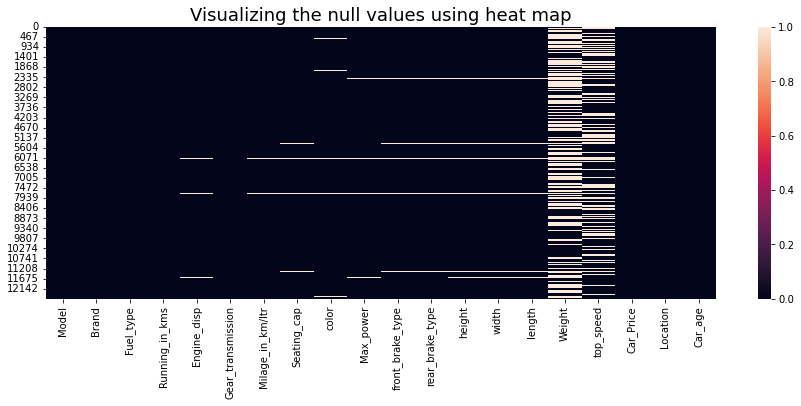

In [329]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.title("Visualizing the null values using heat map",fontsize=18)
plt.show()

## lets treat the  null values using imputation techniqies

In [330]:
df.skew()

Running_in_kms      7.905818
Engine_disp         1.895506
Milage_in_km/ltr   -0.511286
Seating_cap         2.444191
Max_power           2.940126
height              0.955520
width               0.800888
length              0.435033
Weight              1.033183
top_speed           0.896744
Car_Price           9.610232
Car_age             0.723771
dtype: float64

The following columns
- Engine_disp
- Milage_in_km/ltr
- Max_power             
- height
- width
- length
- Weight and 
- top_speed have **continuous data** and contains **more skewness and outliers** so that we can fill the null values with **median** in these columns except the column **"length"** which has **no outliers** so, we can fill the missing values with **mean**.

The remaining columns such as 
- Seating_cap
- color
- front_brake_type and
- rear_brake_type have **categorical data** so that we can replace the null values with most frequently occurred values that is **mode** value. 

In [331]:
# Checking mean value of the column "length"
print("The mean value of 'length' is:",df["length"].mean())

# Checking the median values of the columns "Engine_disp", "Milage_in_km/ltr", "Max_power", "height", "width", "Weight" and "top_speed"
print("\nThe median value of 'Engine_disp' is:",df["Engine_disp"].median())
print("The median value of 'Milage_in_km/ltr' is:",df["Milage_in_km/ltr"].median())
print("The median value of 'Max_power' is:",df["Max_power"].median())
print("The median value of 'height' is:",df["height"].median())
print("The median value of 'width' is:",df["width"].median())
print("The median value of 'Weight' is:",df["Weight"].median())
print("The median value of 'top_speed' is:",df["top_speed"].median())

# Checking the mode values of the categorical columns
print("\nThe mode value of 'Seating_cap' is:",df["Seating_cap"].mode())
print("The mode value of 'color' is:",df["color"].mode())
print("The mode value of 'front_brake_type' is:",df["front_brake_type"].mode())
print("The mode value of 'rear_brake_type' is:",df["rear_brake_type"].mode())

The mean value of 'length' is: 4083.923824172266

The median value of 'Engine_disp' is: 1248.0
The median value of 'Milage_in_km/ltr' is: 19.6
The median value of 'Max_power' is: 86.8
The median value of 'height' is: 1520.0
The median value of 'width' is: 1700.0
The median value of 'Weight' is: 1520.0
The median value of 'top_speed' is: 169.0

The mode value of 'Seating_cap' is: 0    5.0
dtype: float64
The mode value of 'color' is: 0    White
dtype: object
The mode value of 'front_brake_type' is: 0    Disc
dtype: object
The mode value of 'rear_brake_type' is: 0    Drum
dtype: object


In [332]:
# Filling null values in the column "length" by mean value as it does not contains any outliers and skewness
df["length"] = df["length"].fillna(df["length"].mean())

# Filling null values in the remaining numerical columns using median values as these columns contains outliers 
for i in ['Engine_disp','Milage_in_km/ltr','height','Max_power','width','length','Weight','top_speed']:
    df[i] = df[i].fillna(df[i].median())
    
# Filling null values in the categorical columns using mode values
for j in ['Seating_cap','front_brake_type','rear_brake_type','color']:
    df[j] = df[j].fillna(df[j].mode()[0])

In [333]:
# Checking missing values after using imputation techniques
df.isnull().sum()

Model                0
Brand                0
Fuel_type            0
Running_in_kms       0
Engine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
height               0
width                0
length               0
Weight               0
top_speed            0
Car_Price            0
Location             0
Car_age              0
dtype: int64

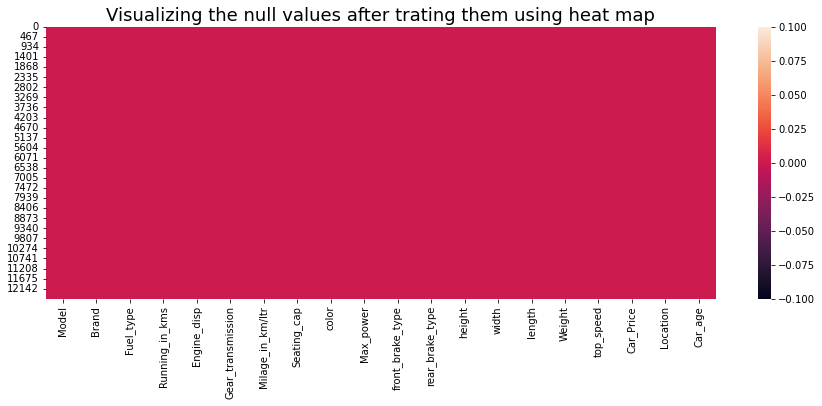

In [334]:
# Let's cross check the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.title("Visualizing the null values after trating them using heat map",fontsize=18)
plt.show()

It is clear from the heat map that there are no null values in any of the column.

In [335]:
# Checking whether the target column contains any space in it
df.loc[df['Car_Price']==" "]

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age


It seems that there are no spaces in the target column.

In [336]:
# Checking the uniqueness of target column
df["Car_Price"].unique()

array([ 294000.,  480000.,  711000., ...,   52000.,   93603., 1415000.])

These are the unique values present in the target column.

Great!!! We have successfully cleaned our dataset. Let's take a look at the dataset after cleaning.

In [337]:
# Let's check the dataframe after cleaning 
df.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age
0,Wagon R,Maruti,Petrol,131125.0,998.0,Manual,21.79,5.0,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,169.0,294000.0,Ahmedabad,7.0
1,Grand i10,Hyundai,Petrol,73875.0,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,1520.0,165.0,480000.0,Ahmedabad,6.0
2,Vento,Volkswagen,Diesel,97922.0,1498.0,Manual,22.27,5.0,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,711000.0,Ahmedabad,3.0
3,S-Presso,Maruti,Petrol,24230.0,998.0,Manual,21.70,5.0,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,169.0,422000.0,Ahmedabad,2.0
4,Wagon R,Maruti,Petrol,41174.0,998.0,Automatic,20.51,5.0,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,1350.0,152.0,430000.0,Ahmedabad,4.0


In [338]:
df.shape

(12607, 20)

In [339]:
# Statistical summary of dataset
df.describe()

,Running_in_kms,Engine_disp,Milage_in_km/ltr,Seating_cap,Max_power,height,width,length,Weight,top_speed,Car_Price,Car_age
count,1.260700e+04,12607.000000,12607.000000,12607.000000,12607.000000,12607.000000,12607.000000,12607.000000,12607.000000,12607.000000,1.260700e+04,12607.000000
mean,5.772320e+04,1436.178552,19.557396,5.218053,100.126298,1563.799239,1718.845562,4083.923824,1603.144364,171.668200,7.710164e+05,6.121044
std,4.027877e+04,494.861632,4.220155,0.693775,44.444489,111.056684,125.365438,398.602917,319.633016,21.388571,1.080174e+06,3.143272
min,2.000000e+02,0.000000,0.000000,2.000000,32.500000,148.000000,1410.000000,3099.000000,1000.000000,86.000000,3.000000e+04,0.000000
25%,3.300000e+04,1197.000000,17.010000,5.000000,74.000000,1488.000000,1673.500000,3765.000000,1510.000000,163.000000,3.510000e+05,4.000000
50%,5.500000e+04,1248.000000,19.600000,5.000000,86.800000,1520.000000,1700.000000,3995.000000,1520.000000,169.000000,5.150000e+05,6.000000
75%,7.586650e+04,1498.000000,22.070000,5.000000,113.400000,1630.000000,1765.000000,4413.000000,1580.000000,175.000000,7.490000e+05,8.000000
max,1.080000e+06,5998.000000,36.000000,10.000000,641.000000,1995.000000,2220.000000,5295.000000,3350.000000,327.000000,3.080000e+07,35.000000


The describe() method gives the statistical information of the dataset. The summary of this dataset looks perfect since there are no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

The counts of every column is same which means there are no missing values present in the dataset as we are already treated them.

The min value for "Engine_disp", "Milage_in_km/ltr" and "Car_age" is 0, which is not realistic. And looking at the maximum values for columns "Running_in_kms", "Engine_disp", "Max_power", "width", "length", "Weight", "top_speed" and "Car_Price" we can say that there are huge outliers present in our data.

The mean value is greater than the median(50%) in the columns such as "Engine_disp", "Max_power", "length", "Weight", "top_speed" and "Car_Price" have high differences which means these columns are skewed to right. 

In the column "Milage_in_km/ltr", the median value is bit greater than mean which means the data is skewed to left.

We need to remove these outliers and skewness except target column using appropriate methodsbefore building our machine learning models.

lets separate the dataset into catagorical and numerical columns

In [340]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Model', 'Brand', 'Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Location']

Numerical columns present in the dataset are:
 ['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'length', 'Weight', 'top_speed', 'Car_Price', 'Car_age']


# Data visualization

In [341]:
#Plotting count plots for columns having catagorical data
def value_counts(column):
    counts=len(df[column].value_counts())
    if counts<5:
        plt.figure(figsize=(5,5))
    elif counts<10:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    elif counts<20:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)    
    else:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=df)
    plt.show()
    print("*"*200)



Swift                       742
i20                         708
Grand i10                   546
City                        508
Swift Dzire                 489
Wagon R                     463
Ecosport                    346
Baleno                      329
i10                         313
Verna                       303
Ciaz                        301
Polo                        273
Alto K10                    263
Vitara Brezza               232
KWID                        216
XUV500                      215
Amaze                       202
Creta                       200
Vento                       194
Alto 800                    192
Celerio                     191
Ertiga                      176
Jazz                        162
Innova                      158
Brio                        153
EON                         129
Xcent                       113
Duster                      111
Figo                        107
Rapid                       107
Fortuner                    107
Ignis   

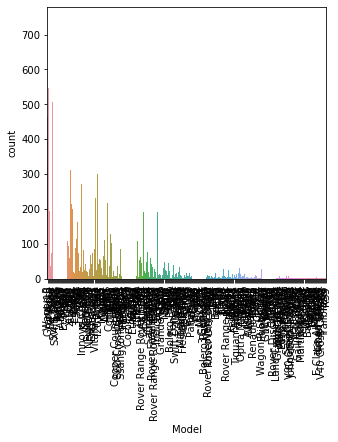

********************************************************************************************************************************************************************************************************
Maruti           4018
Hyundai          2592
Honda            1207
Toyota            632
Ford              599
Mahindra          553
Volkswagen        550
Renault           397
BMW               304
Tata              302
Mercedes-Benz     291
Audi              273
Skoda             253
Nissan            128
Chevrolet         120
Land               50
Kia                48
Jaguar             42
Datsun             41
Jeep               39
Volvo              31
MG                 29
Porsche            25
Fiat               25
Mini               22
Mitsubishi         16
Isuzu               7
Lexus               3
Lamborghini         2
Ambassador          2
Bentley             2
Aston               1
Force               1
OpelCorsa           1
Maserati            1
Name: Brand, dtype: int64


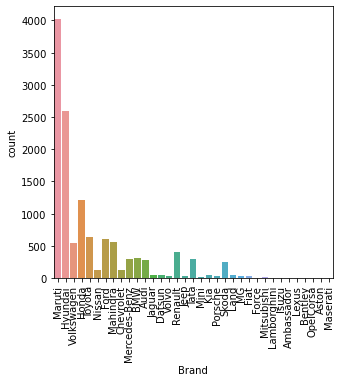

********************************************************************************************************************************************************************************************************
Petrol      7055
Diesel      5422
CNG           92
LPG           27
Electric      11
Name: Fuel_type, dtype: int64


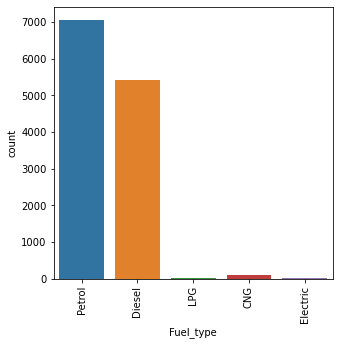

********************************************************************************************************************************************************************************************************
Manual       9607
Automatic    3000
Name: Gear_transmission, dtype: int64


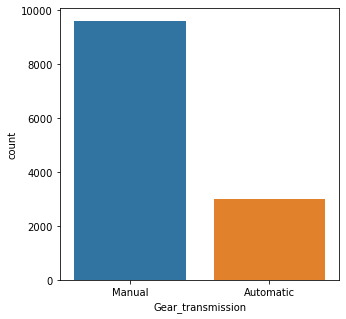

********************************************************************************************************************************************************************************************************
White                      3902
Silver                     1905
Other                      1729
Grey                       1576
Red                         986
Blue                        678
Black                       529
Brown                       349
Maroon                      254
Golden                      179
Orange                      139
Green                        35
Golden Brown                 12
Violet                       11
Beige                        11
SILKY SILVER                 10
Purple                       10
BEIGE                         9
Urban Titanium                8
Yellow                        8
Bronze                        8
Sky Blue                      7
U Titanium                    6
MET ECRU BEIGE                6
Gold                          6

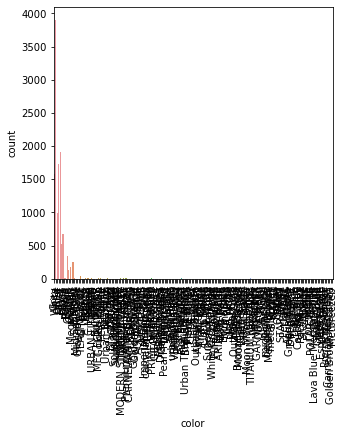

********************************************************************************************************************************************************************************************************
Disc                                        7384
Ventilated Disc                             5062
Disc & Caliper Type                           83
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                        11
Disc & Drum                                    7
Vacuum assisted hydraulic dual circuit w       7
Disc,internally ventilated                     6
Carbon ceramic                                 2
Booster assisted ventilated disc               2
Mechanical-hydraulic dual circuit              1
Ventilated & Grooved Steel Discs               1
Dual Circuit with ABS, ABS with BAS            1
Tandem master cylinder with Servo assist       1
Name: front_brake_type, dtype: int64


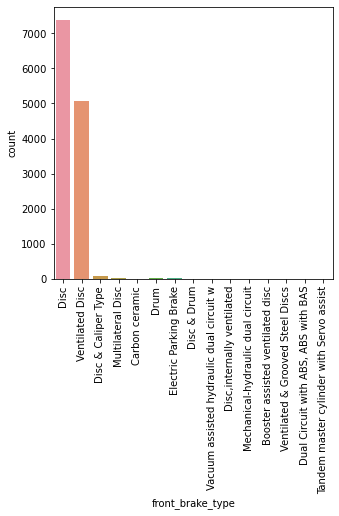

********************************************************************************************************************************************************************************************************
Drum                                        10266
Disc                                         1658
Ventilated Disc                               357
Leading-Trailing Drum                         111
Disc & Caliper Type                            83
Self-Adjusting Drum                            69
Disc & Drum                                    25
Electric Parking Brake                         11
Ventilated Drum                                 8
Vacuum assisted hydraulic dual circuit w        7
Drum in disc                                    4
Booster assisted drum                           2
Carbon ceramic                                  2
Mechanical-hydraulic dual circuit               1
Ventilated & Grooved Steel Discs                1
Dual Circuit with ABS, ABS with BAS             1

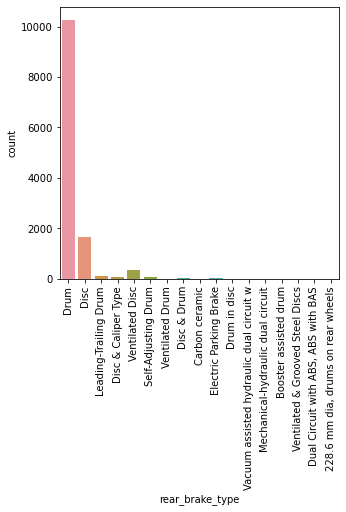

********************************************************************************************************************************************************************************************************
Delhi_NCR    1490
Bangalore    1486
Mumbai       1478
New_Delhi    1473
Pune         1238
Gurgaon      1040
Noida         982
Hyderabad     918
Chennai       836
Kolkata       595
Ahmedabad     579
Jaipur        492
Name: Location, dtype: int64


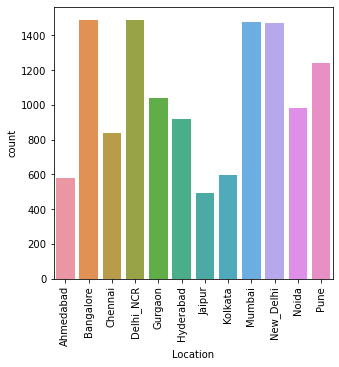

********************************************************************************************************************************************************************************************************


In [342]:
countplots=df[['Model', 'Brand', 'Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Location']
]
for i in countplots:
    print(countplots[i].value_counts())
    value_counts(i)

Observations from the count plots

The above count plot gives the count of cars' brand. From the graph we can conclude that we are having most of the cars from Maruti and Hyundai brand as the count is high for these brands.

The above plot gives the count of fuel types used by the cars. More number of cars are using petrol followed by diesel as fuel. And very few cars uses CNG, LPG and Electricity as fuel type.

The above plot gives the count of transmission, from this graph we can notice that around 76% of the cars are with Manual gear transmission system and only 23% of the cars are with Automatic gear transmission system.

By visualizing the above count plot we can conclude that the cars with Disc and Ventilated Disc type of brake system used for front-side wheels are having high count compared to other brake types.

The above graph represents the count of rear_brake_type of the cars which shows that the cars having Drum type of brake system used for back-side wheels are having high count of around 10000 compared to other type of rear brakes.

By looking at the above count plot we can get to know that the cars from the city Delhi_NCR, Bangalore, Mumbai and New_Delhi have high counts which are almost similar. And the other locations also have no much difference in the counts.



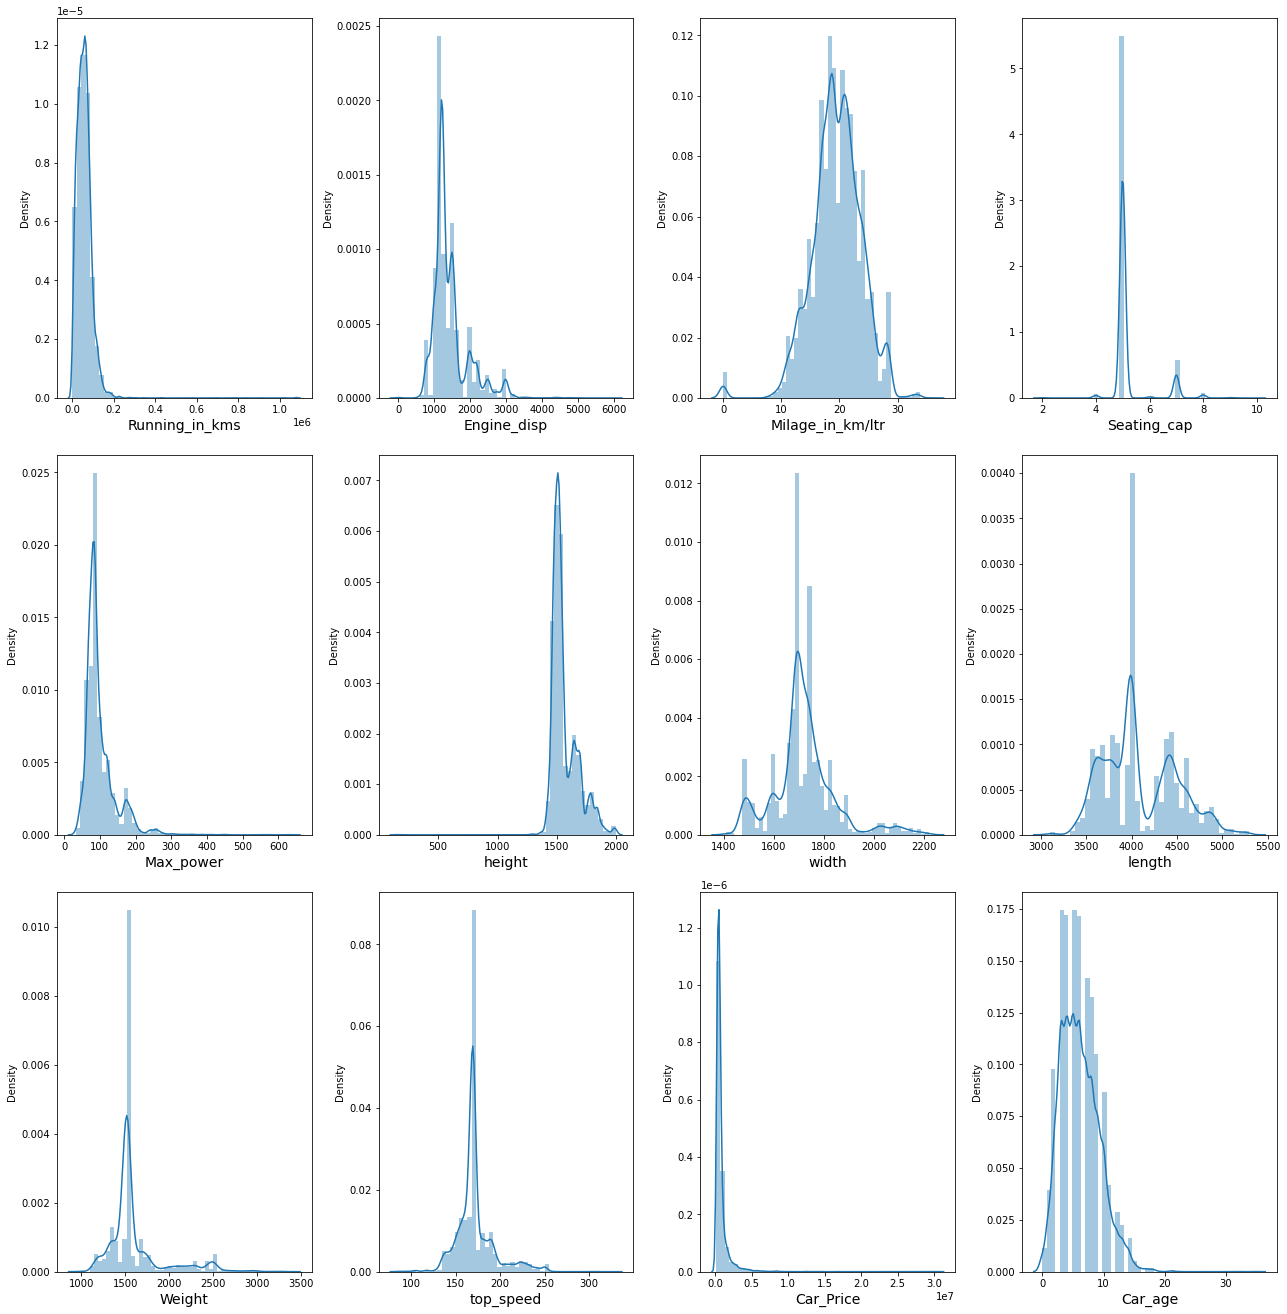

In [343]:
# now the data looks good and there is no missing values and Object values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1

for column in numerical_col:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=14)
    
    plotnumber+=1
plt.tight_layout()

### Observations from the distplots

Above plot shows how the data has been distributed in each of the columns.

From the distribution plots we can observe most of the columns are not normally distributed, only the columns "Milage_in_km/ltr" looks somewhat normal.

Also, we can notice the columns like "Running_in_kms", "Engine_disp", "Max_power", "Weight", "Car_age" etc are skewed to right as the mean value in these columns are much greater than the median(50%).

The data in the column "height" skewed to left since the mean values is less than the median.

We need to remove this skewness before building our machine learning models.

Now lets identify the outliers in the dataset

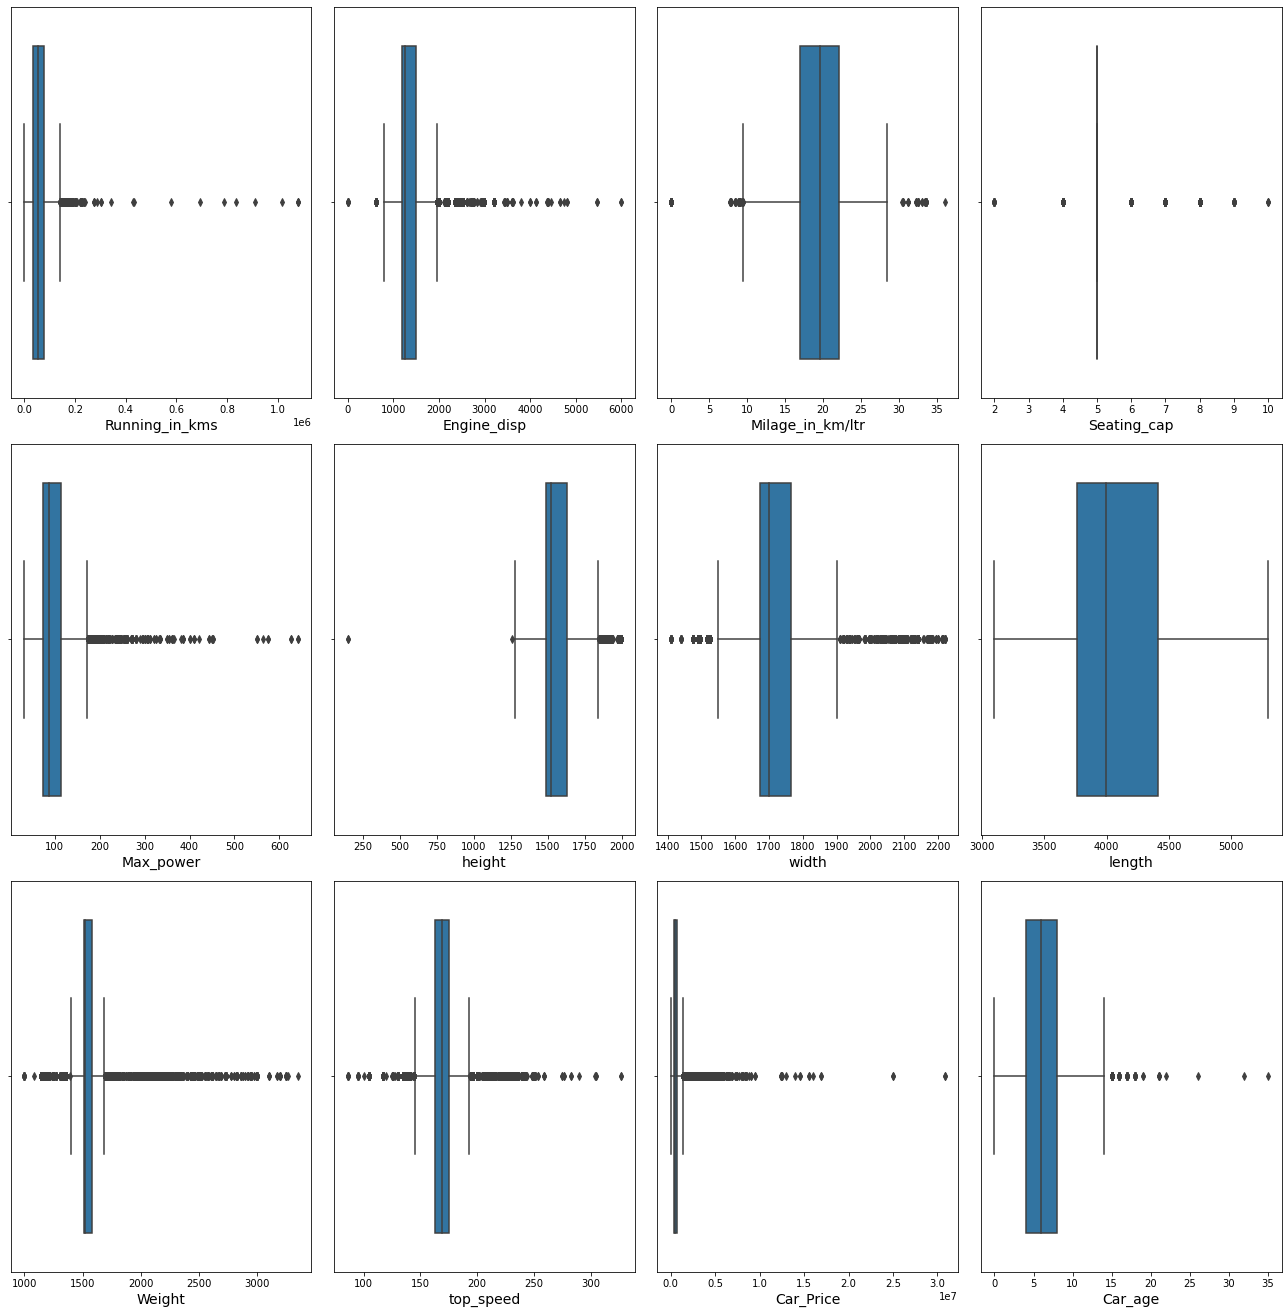

In [344]:
# Identifying the outliers using boxplot
plt.figure(figsize=(18,30))
plotnumber=1
for column in numerical_col:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

Observations fromt he box plots

From the above box plots we can observe all the columns contains the outliers except "length". 

Also the column Car_Price is our target variable, so no need to remove outliers in these two columns. Let's remove the outliers in the remaining columns.

## Encoding the categorical columns using Label Encoder Method

In [345]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [346]:
# Displaying the categorical columns after encoding 
df[categorical_col].head()

,Model,Brand,Fuel_type,Gear_transmission,color,front_brake_type,rear_brake_type,Location
0,246,21,4,1,70,2,6,0
1,110,11,4,1,176,2,6,0
2,238,33,1,1,176,14,6,0
3,192,21,4,1,135,14,6,0
4,246,21,4,0,70,14,6,0


In [347]:
# Displaying the categorical columns after encoding 
df[categorical_col].head()

,Model,Brand,Fuel_type,Gear_transmission,color,front_brake_type,rear_brake_type,Location
0,246,21,4,1,70,2,6,0
1,110,11,4,1,176,2,6,0
2,238,33,1,1,176,14,6,0
3,192,21,4,1,135,14,6,0
4,246,21,4,0,70,14,6,0


In [348]:
# Checking the correlation between features and the target
cor = df.corr()
cor

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age
Model,1.000000,0.087474,-0.039167,0.007802,-0.060203,0.110751,0.010552,0.024636,0.042954,-0.075207,-0.054409,-0.079792,0.168077,0.026507,-0.092191,0.068007,-0.055250,-0.060667,0.010853,0.019316
Brand,0.087474,1.000000,-0.038819,0.043742,-0.006247,0.082930,0.041314,0.178718,0.005493,-0.153298,0.029080,-0.061217,0.120251,-0.104078,0.005629,0.109646,-0.201858,-0.072236,0.012717,-0.041195
Fuel_type,-0.039167,-0.038819,1.000000,-0.293912,-0.442102,0.065320,-0.163712,-0.294084,-0.021806,-0.274554,-0.087947,-0.010096,-0.298167,-0.456823,-0.420299,-0.429105,-0.217601,-0.199922,0.012304,-0.001679
Running_in_kms,0.007802,0.043742,-0.293912,1.000000,0.188099,0.074655,-0.056297,0.160689,0.043354,0.047631,0.115605,0.074183,0.084174,0.091123,0.157199,0.190943,0.039096,-0.125934,0.004577,0.419408
Engine_disp,-0.060203,-0.006247,-0.442102,0.188099,1.000000,-0.408621,-0.577083,0.442304,-0.017039,0.851570,0.084111,0.091387,0.373970,0.713473,0.799484,0.729988,0.570165,0.569269,-0.029555,0.092934
Gear_transmission,0.110751,0.082930,0.065320,0.074655,-0.408621,1.000000,0.330736,0.008367,0.029554,-0.541304,0.008892,-0.007117,0.003415,-0.425152,-0.415493,-0.286111,-0.468910,-0.439842,0.026948,0.116637
Milage_in_km/ltr,0.010552,0.041314,-0.163712,-0.056297,-0.577083,0.330736,1.000000,-0.326534,-0.015027,-0.533438,-0.008419,-0.027129,-0.282081,-0.376130,-0.478287,-0.493121,-0.296758,-0.316269,0.035995,-0.236190
Seating_cap,0.024636,0.178718,-0.294084,0.160689,0.442304,0.008367,-0.326534,1.000000,0.026082,0.164187,0.016322,0.027792,0.676942,0.228236,0.335647,0.510589,-0.117487,0.084439,-0.023913,0.001573
color,0.042954,0.005493,-0.021806,0.043354,-0.017039,0.029554,-0.015027,0.026082,1.000000,-0.033850,-0.006830,-0.013167,0.034218,-0.020640,-0.033256,0.006697,-0.067670,-0.015744,0.008493,-0.000430
Max_power,-0.075207,-0.153298,-0.274554,0.047631,0.851570,-0.541304,-0.533438,0.164187,-0.033850,1.000000,0.025962,0.062127,0.160717,0.759133,0.777670,0.611324,0.745728,0.727777,-0.025571,-0.013806


In [349]:
#sorting the correlation values of Chu with all the columns
df.corr()['Car_Price'].sort_values()

Gear_transmission   -0.439842
Milage_in_km/ltr    -0.316269
Car_age             -0.260553
Fuel_type           -0.199922
Running_in_kms      -0.125934
Brand               -0.072236
Model               -0.060667
Location            -0.048514
color               -0.015744
front_brake_type    -0.008037
rear_brake_type      0.062058
Seating_cap          0.084439
height               0.146662
Weight               0.394042
length               0.494263
top_speed            0.508726
width                0.562153
Engine_disp          0.569269
Max_power            0.727777
Car_Price            1.000000
Name: Car_Price, dtype: float64

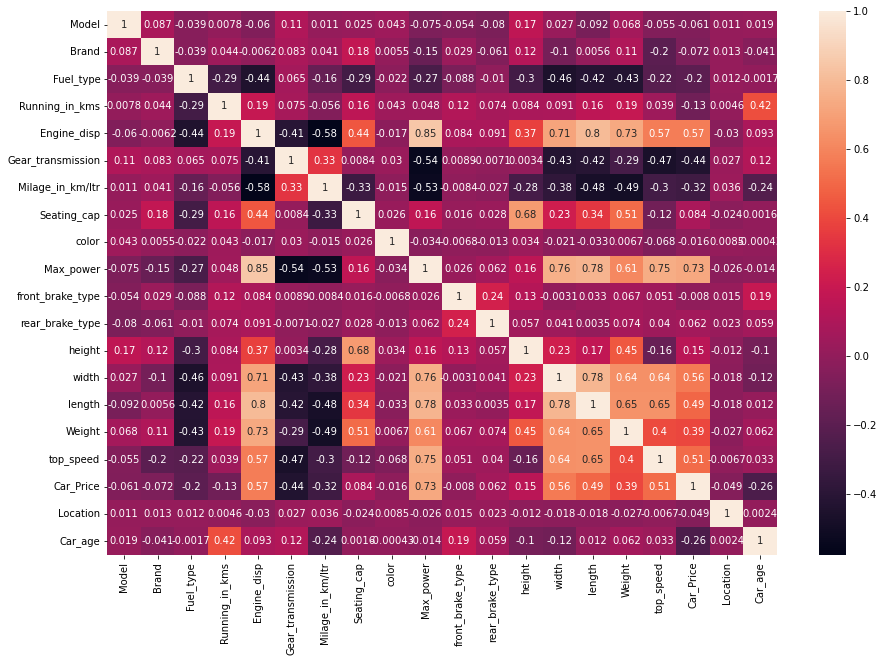

In [350]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(df.corr(),annot=True)
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.
From the heat map we can notice that the dark shades are highly positively correlated and light shades are highly negatively correlated with the target variable.

The columns "Max_power", "width", "length", "Engine_disp", "top_speed" and "Weight" have strong positive relation with the target variable "Car_Price".

The other columns like "Gear_transmission", "Car_age", "rear_brake_type", "Fuel_type", "Milage_in_km" etc are highly negatively correlated with the target variable "Car_Price".

We can observe from the map that most of the columns are highly correlated with each other which leads to multicollinearity problem.So, we will check the VIF value and remove the columns having high VIF value to overcome with this multicollinearity problem.

In [351]:
#Lets plot some more graphs to have a better understanding of the data 
#now lets split the dataset into features and labels 

y=df['Car_Price']
x=df.drop(columns=['Car_Price'])

In [352]:
x.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Location,Car_age
0,246,21,4,131125.0,998.0,1,21.79,5.0,70,67.05,2,6,1675.0,1620.0,3655.0,1340.0,169.0,0,7.0
1,110,11,4,73875.0,1197.0,1,18.90,5.0,176,82.00,2,6,1520.0,1660.0,3765.0,1520.0,165.0,0,6.0
2,238,33,1,97922.0,1498.0,1,22.27,5.0,176,108.60,14,6,1467.0,1699.0,4390.0,1750.0,180.0,0,3.0
3,192,21,4,24230.0,998.0,1,21.70,5.0,135,67.05,14,6,1564.0,1520.0,3565.0,1170.0,169.0,0,2.0
4,246,21,4,41174.0,998.0,0,20.51,5.0,70,67.00,14,6,1700.0,1495.0,3599.0,1350.0,152.0,0,4.0


In [353]:
y.head()

0    294000.0
1    480000.0
2    711000.0
3    422000.0
4    430000.0
Name: Car_Price, dtype: float64

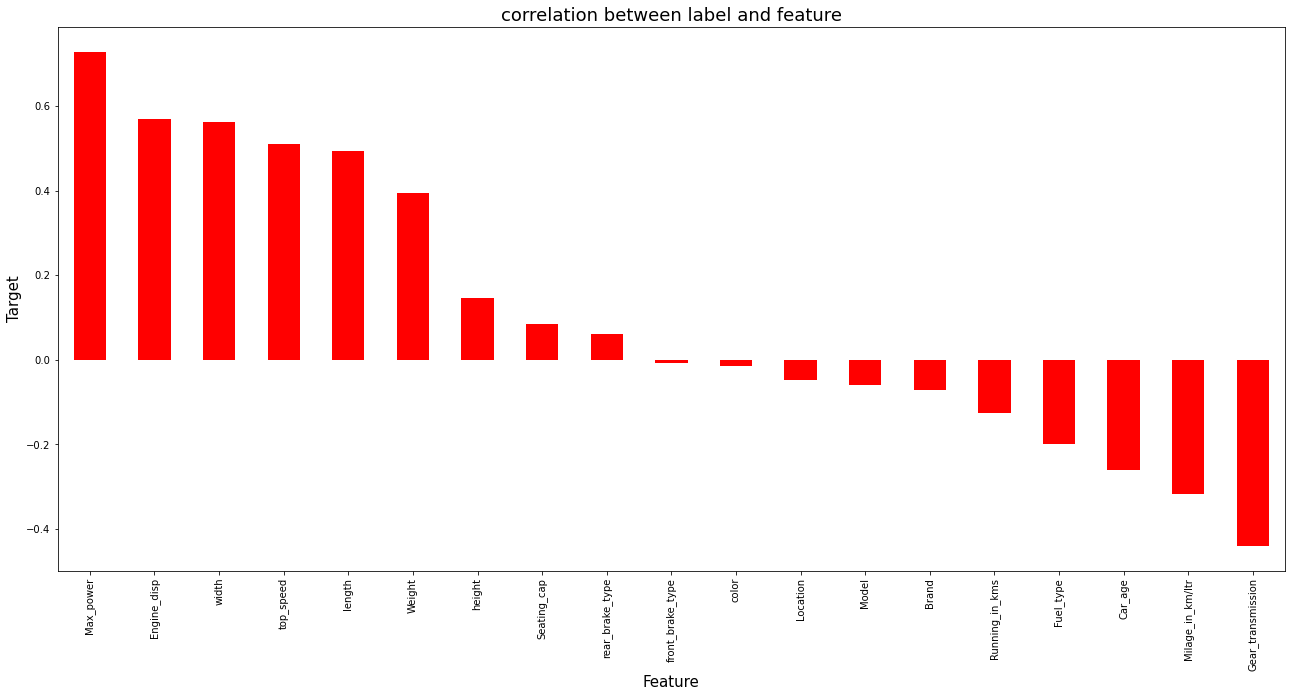

In [354]:
#Correlation between the feature and label
plt.figure(figsize=(22,10))
df.corr()['Car_Price'].sort_values(ascending=False).drop(['Car_Price']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "color" is less correlated with the label compared to others, we can drop this columns if necessary but for now let's keep it as it is.

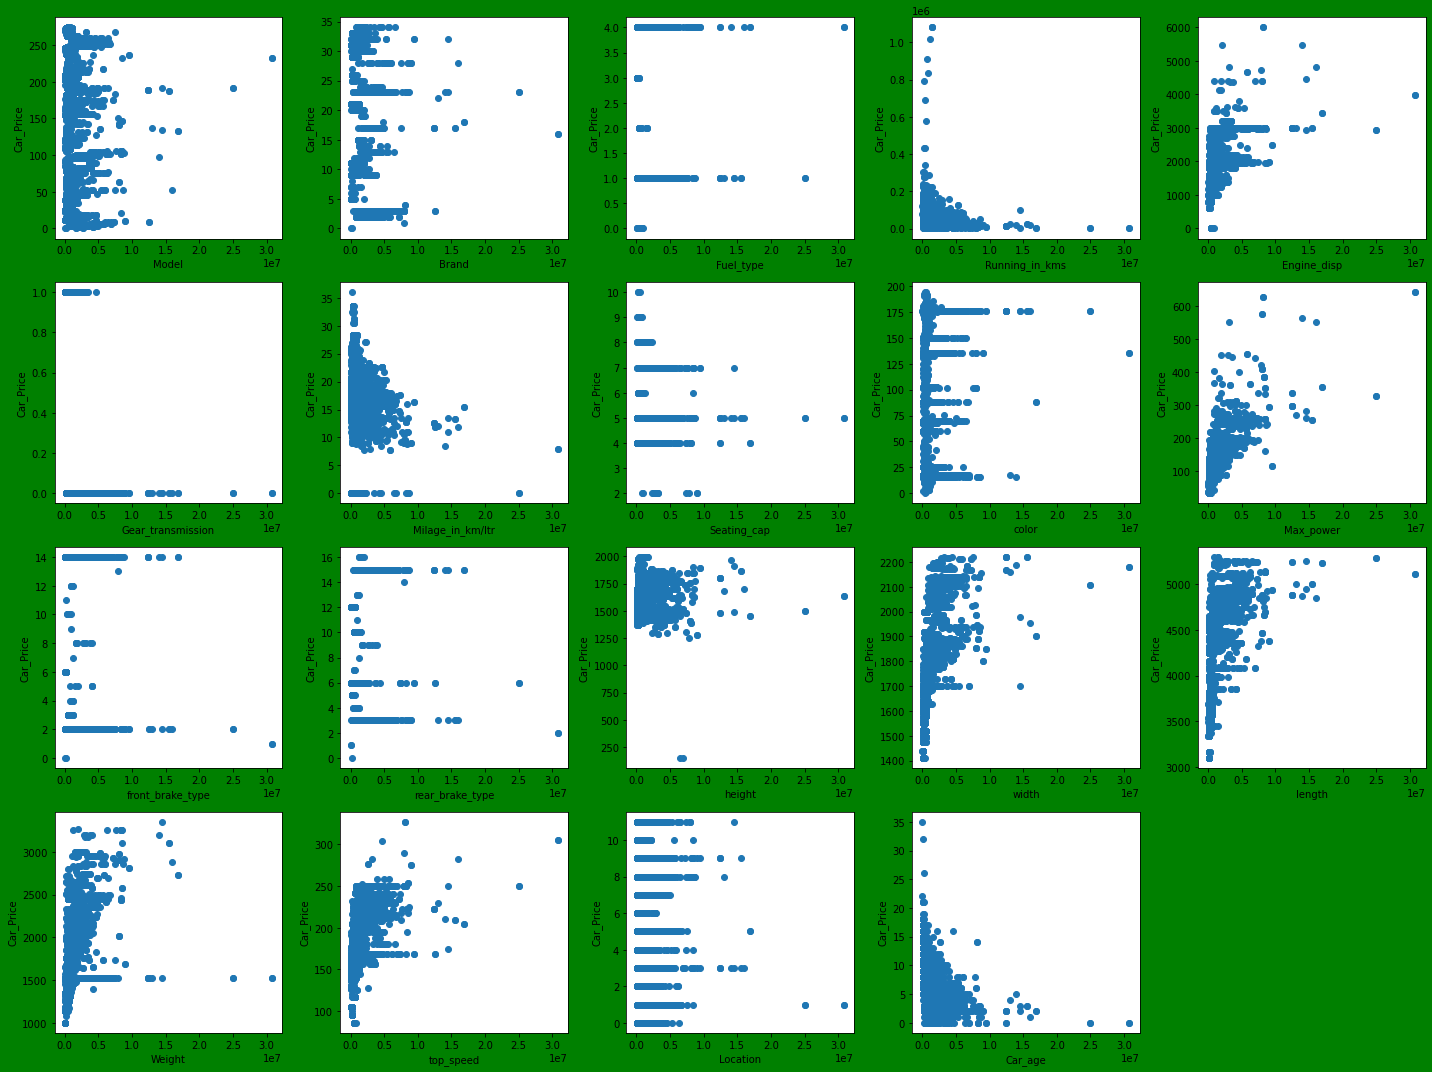

In [355]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        plt.scatter(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Car_Price',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

the trend not clear here sp lets plot regplot to find the trend

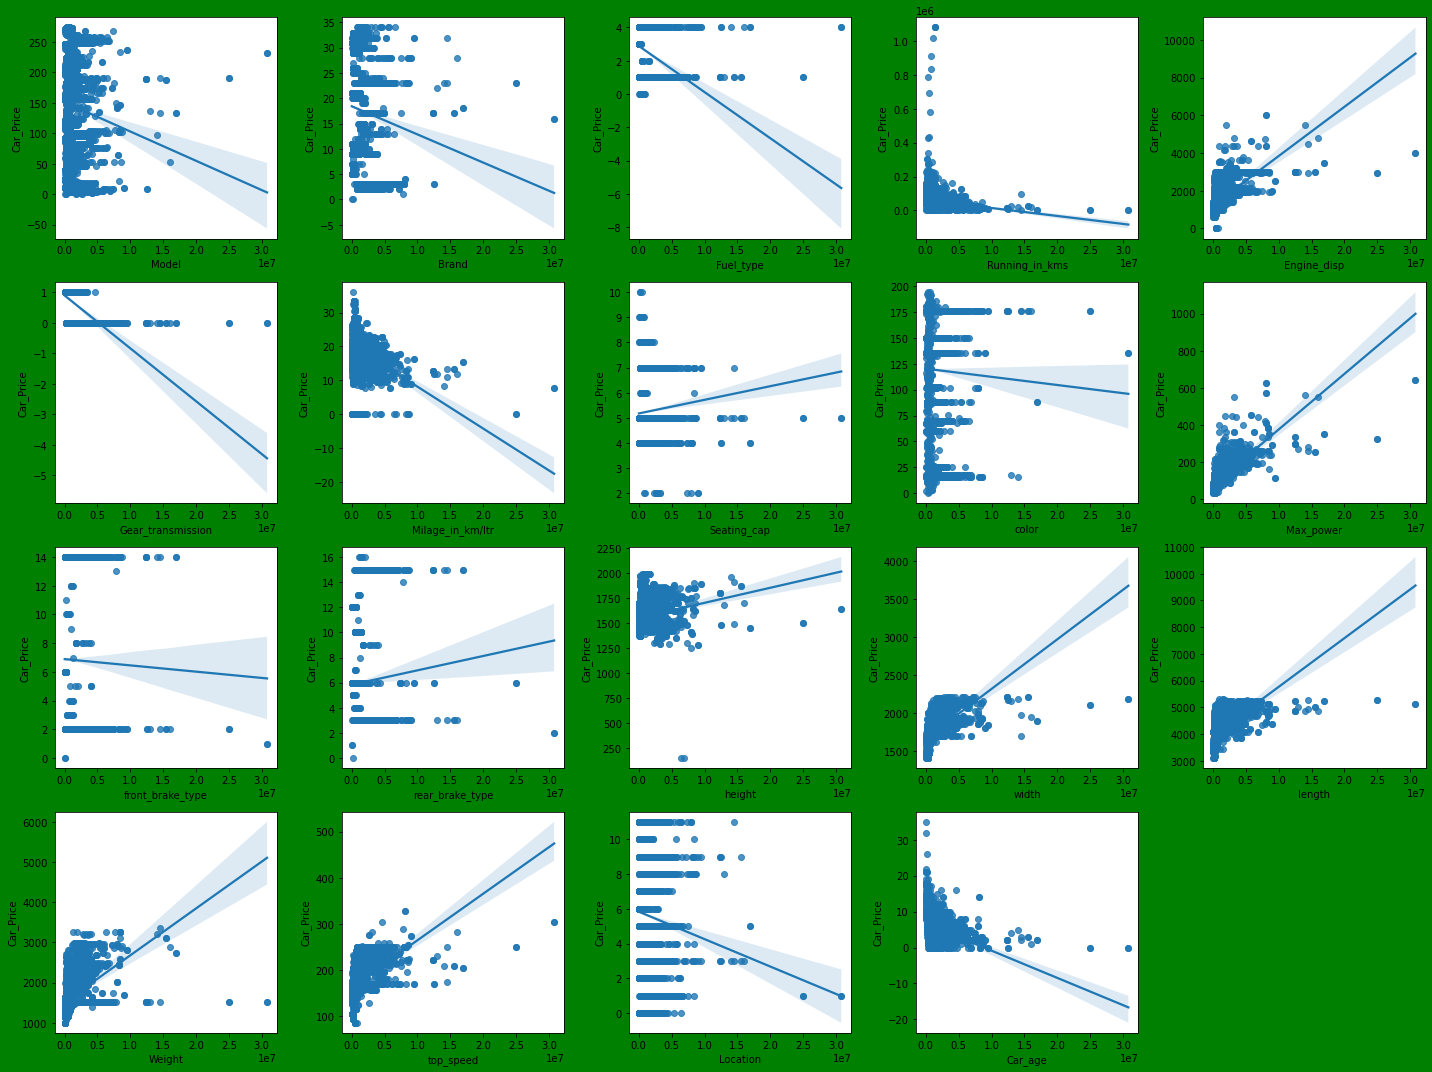

In [356]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        sns.regplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Car_Price',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

Observations fromt the reg plots

From the bar plot we can observe that the cars which have Automatic gear transmission system are having high price compared to the cars which have Manual gear transmission system.

cars with Disc and Ventilated Disc system for front wheels are having higher prices than other type of braking systems.

the cars having Ventilated Disc or Disc or Drum brake system are having higher prices than the cars with other type of braking system at rear side.

The white color cars are more expensive compared to the cars with other colors.

the car prices increases with increasing seating capacity.

From the plot we can say that the prices of cars are higher for the cars which have less running in kms. We can also notice there is negative linear relation between the price and running of cars.

There is a positive correlation between car price and engine displacement. So, we can say as the engine disp or engine cc increases, the price of car also increases.

The cars having the milage in the range of 10 to 20 km/ltr are having high sale price. From the graph we can also notice there is negative linear/correlation between the price nad milage also some used cars have 0 milage which is unrealistic.

Looking at the graph we can say there is positive correlation between car price and maximum engine power so, we can say as maximum power engine increases, the car prices also go on increasing.

maximum speed limit of the car (top_speed) increases, the car price also increases.

we can say that as the age decreases, the car prices increases.

## Removing outliers from dataset
### i) Zscore method

In [357]:
# Features containing outliers
features = df[['Running_in_kms','Engine_disp','Milage_in_km/ltr','Seating_cap','Max_power','height','width','Weight','top_speed','Car_age']]

# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))

In [358]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age
0,246,21,4,131125.0,998.0,1,21.79,5.0,70,67.05,2,6,1675.0,1620.0,3655.0,1340.0,169.0,294000.0,0,7.0
1,110,11,4,73875.0,1197.0,1,18.90,5.0,176,82.00,2,6,1520.0,1660.0,3765.0,1520.0,165.0,480000.0,0,6.0
2,238,33,1,97922.0,1498.0,1,22.27,5.0,176,108.60,14,6,1467.0,1699.0,4390.0,1750.0,180.0,711000.0,0,3.0
3,192,21,4,24230.0,998.0,1,21.70,5.0,135,67.05,14,6,1564.0,1520.0,3565.0,1170.0,169.0,422000.0,0,2.0
4,246,21,4,41174.0,998.0,0,20.51,5.0,70,67.00,14,6,1700.0,1495.0,3599.0,1350.0,152.0,430000.0,0,4.0


In [359]:
# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)

Shape of dataset before removing outliers: (12607, 20)
Shape of dataset after removing outliers: (11480, 20)


In [360]:
# Checking the data loss after removing outliers
data_loss = (12608-11481)/12608*100
data_loss

8.938769035532996

By using Zscore I am losing around 8.9% of data which is acceptable as the acceptable range of data loss is less than 10. 
Let's try to remove outliers using IQR method and check the data loss.

## ii) IQR (InterQuartile Range) method

In [361]:
# Removing outliers using IQR method
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [362]:
print("Shape of data after using IQR method:", df1.shape)

Shape of data after using IQR method: (6464, 20)


In [363]:
# Checking the the data loss after removing outliers
data_loss = (12608-6464)/12608*100
data_loss

48.73096446700508

## Checking for skewness in the data

In [364]:
# Checking the skewness
new_df.skew()

Model                0.006857
Brand                0.225408
Fuel_type           -0.403426
Running_in_kms       0.553679
Engine_disp          1.323528
Gear_transmission   -1.442205
Milage_in_km/ltr     0.094979
Seating_cap          3.187115
color               -0.571855
Max_power            1.392904
front_brake_type     0.434763
rear_brake_type      2.299625
height               1.275819
width                0.358615
length               0.415425
Weight               1.908727
top_speed            0.965977
Car_Price            3.536998
Location            -0.019904
Car_age              0.490229
dtype: float64

We can find the skewness in all the columns except "Milage_in_km/ltr", "width", "length", and "Car_age". Let's remove skewness in the remaining columns.

## Removing skewness using yeo-johnson method

In [365]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ["Running_in_kms","Engine_disp","Seating_cap","Max_power","height","Weight","top_speed"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [366]:
new_df[skew1] = scaler.fit_transform(new_df[skew1].values)
new_df[skew1].head()

,Running_in_kms,Engine_disp,Seating_cap,Max_power,height,Weight,top_speed
0,2.130585,-1.195745,-0.199682,-1.002255,8.881784e-16,-1.079247,0.030497
1,0.676616,-0.322918,-0.199682,-0.221494,-1.665335e-16,0.027339,-0.215268
2,1.327837,0.627999,-0.199682,0.729803,-6.661338e-16,0.992019,0.654093
3,-1.041865,-1.195745,-0.199682,-1.002255,1.942890e-16,-2.600610,0.030497
4,-0.366949,-1.195745,-0.199682,-1.005316,1.026956e-15,-1.006493,-1.096153


In [367]:
# Checking skewness after using yeo-johnson method
new_df[skew1].skew()

Running_in_kms   -0.066982
Engine_disp      -0.019154
Seating_cap      -2.369646
Max_power        -0.017598
height            0.000000
Weight           -0.120631
top_speed        -0.049770
dtype: float64

We can observe the skewness has almost been removed in all the columns but in "Seating_cap". In this column the skewness has been reduced bit, it seems that the data in this column may be important so keeping it as it is.
The column "height" has zero skewness which means it contains only unique entry that is zero throughout the dataset, So we can drop this column.

In [368]:
# Dropping irrelevant colum
new_df.drop("height",axis=1,inplace=True)

In [369]:
x = new_df.drop("Car_Price", axis=1)
y = new_df["Car_Price"]

In [370]:
# Dimension of x and y
x.shape, y.shape

((11480, 18), (11480,))

Now lets use standard scalar to scale the data

In [371]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,width,length,Weight,top_speed,Location,Car_age
0,1.123628,0.393486,0.822034,2.130585,-1.195745,0.511815,0.470178,-0.199682,-0.931916,-1.002255,-0.808135,0.154484,-0.790287,-1.073662,-1.079247,0.030497,-1.633409,0.336598
1,-0.446222,-0.844923,0.822034,0.676616,-0.322918,0.511815,-0.340884,-0.199682,1.063505,-0.221494,-0.808135,0.154484,-0.415343,-0.765878,0.027339,-0.215268,-1.633409,0.000468
2,1.031284,1.879578,-1.208437,1.327837,0.627999,0.511815,0.604888,-0.199682,1.063505,0.729803,1.242305,0.154484,-0.049773,0.982890,0.992019,0.654093,-1.633409,-1.007921
3,0.500305,0.393486,0.822034,-1.041865,-1.195745,0.511815,0.444920,-0.199682,0.291691,-1.002255,1.242305,0.154484,-1.727647,-1.325484,-2.600610,0.030497,-1.633409,-1.344051
4,1.123628,0.393486,0.822034,-0.366949,-1.195745,-1.953831,0.110954,-0.199682,-0.931916,-1.005316,1.242305,0.154484,-1.961986,-1.230351,-1.006493,-1.096153,-1.633409,-0.671791


We have scaled the data using StandardScaler method to overcome with the issue of data biasness and displayed the data of independent variables after scaling. 

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns in order to overcome with the multicollinearity issue.

## Checking Variance Inflation Factor (VIF)

In [372]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.139662,Model
1,1.231563,Brand
2,3.347848,Fuel_type
3,1.773736,Running_in_kms
4,8.978010,Engine_disp
5,1.340092,Gear_transmission
6,3.194322,Milage_in_km/ltr
7,1.334445,Seating_cap
8,1.012981,color
9,9.994342,Max_power


We can observe the column "Max_Power" has VIF 10 that means it is causing multicollinearity problem. Let's drop the feature having high VIF value amongst all the columns.

In [373]:
# Dropping Max_power column as it contains high VIF value
x.drop(["Max_power"],axis=1,inplace=True)

In [374]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.133448,Model
1,1.131633,Brand
2,3.131947,Fuel_type
3,1.773732,Running_in_kms
4,6.102955,Engine_disp
5,1.295438,Gear_transmission
6,3.188839,Milage_in_km/ltr
7,1.327702,Seating_cap
8,1.012971,color
9,1.101391,front_brake_type


# Building Machine Learning Models and finding the best model among them

In [375]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=488)
y_train.head()

8011     299000.0
7330     725000.0
6723     132000.0
1922    3785000.0
3466     392000.0
Name: Car_Price, dtype: float64

In [376]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [377]:
regression=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
svr=SVR()
dtc=DecisionTreeRegressor()

LinearRegression()
adjusted R2 score for training data------ 0.6368031491277315
adjusted R2 score for testing data------ 0.6396178169597353
mean absolute error------ 184521.784022916
mean squared error------ 91046690990.2657
root mean squared error------ 301739.442218391


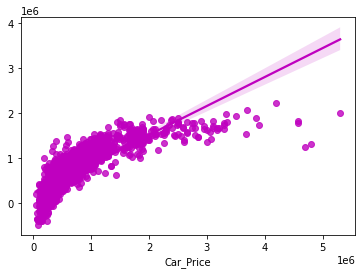

KNeighborsRegressor()
adjusted R2 score for training data------ 0.922794713036231
adjusted R2 score for testing data------ 0.8635604077365908
mean absolute error------ 92976.00620209059
mean squared error------ 34469998740.9104
root mean squared error------ 185660.97797035973


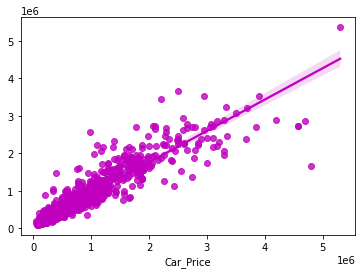

SVR()
adjusted R2 score for training data------ -0.06702751537626983
adjusted R2 score for testing data------ -0.061759747760634864
mean absolute error------ 278321.4927514424
mean squared error------ 268242205662.7153
root mean squared error------ 517921.041919244


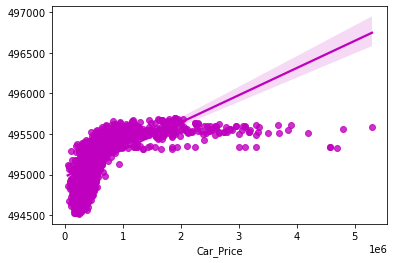

RandomForestRegressor()
adjusted R2 score for training data------ 0.9933299391339474
adjusted R2 score for testing data------ 0.9476069860801724
mean absolute error------ 52045.61308893314
mean squared error------ 13236532694.720585
root mean squared error------ 115050.13122426494


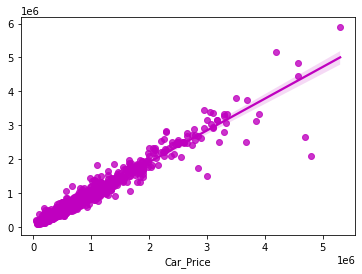

DecisionTreeRegressor()
adjusted R2 score for training data------ 0.9999337650786366
adjusted R2 score for testing data------ 0.9073713344022438
mean absolute error------ 62878.025551684084
mean squared error------ 23401638289.58575
root mean squared error------ 152975.94023108913


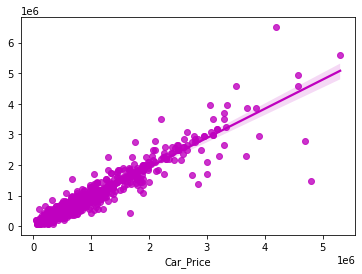

In [378]:
models = [regression, knn, svr, rf,dtc]
for m in models:
    print (m)
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print ('adjusted R2 score for training data------',m.score(x_train, y_train))
    print ('adjusted R2 score for testing data------',m.score(x_test, y_test))
    print ("mean absolute error------",mean_absolute_error(y_test,y_pred))
    print ("mean squared error------",mean_squared_error(y_test,y_pred))
    print ("root mean squared error------",np.sqrt(mean_squared_error(y_test,y_pred)))
    sns.regplot(y_test,y_pred,color="m")
    plt.show()


In [380]:
# Cross validation scores for all models
from sklearn.model_selection import cross_val_score
for m in models:
    c_v= cross_val_score(m, x, y, cv = 10)
    print ('Cross Validation Score for ',m, ' is :', c_v.mean())
    print (' ')

Cross Validation Score for  LinearRegression()  is : 0.5906065666136364
 
Cross Validation Score for  KNeighborsRegressor()  is : 0.8451661795584222
 
Cross Validation Score for  SVR()  is : -0.07613551249779822
 
Cross Validation Score for  RandomForestRegressor()  is : 0.9290906912154833
 
Cross Validation Score for  DecisionTreeRegressor()  is : 0.8809435540114816
 


After analysing all the models we have concluded that RandomForestRegressor() model gives the best R2 score and cross validation score. And based on the R2 score we have chosen RandomForestRegressor() as the best model. We will use RandomForestRegressor() model for further analysis.

# Hyperparameter Tuning of RandomForestRegressor() model using GridSearchCV

In [390]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'min_samples_split': [2, 5, 10],'max_features':['auto', 'sqrt'],'min_samples_leaf':[1,2,4],'n_estimators': [2,5,8,10,17]}

In [391]:
gridsearch=GridSearchCV(estimator=rf , param_grid=param_grid )

In [392]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 5, 8, 10, 17]})

In [393]:
gridsearch.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [394]:
rf=RandomForestRegressor(max_features='auto', min_samples_leaf=1,min_samples_split=2,n_estimators=10)

In [395]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='auto', n_estimators=10)

In [396]:
y_pred=rf.predict(x_test)


In [397]:
y_pred

array([275000., 570900., 761300., ..., 117700., 631800., 686100.])

In [398]:
rf.score(x_train,y_train)

0.9901744739843533

In [399]:
rf.score(x_test, y_test)



0.9415711229666756

In [401]:
Predicted_Used_Car_Price = pd.DataFrame([rf.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
Predicted_Used_Car_Price

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [402]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle17'
pickle.dump(rf,open('finalized_model.pickle17','wb'))

Conclusions

The case study aims to give an idea of applying Machine Learning algorithms to predict the sale price of the used cars. After the completion of this project, we got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.

First we collected the used cars data from website www.cardekho.com and it was done by using Web scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 12608 of data which contained the selling price of the used cars and other related features. Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.

Then we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization. 

From the visualizations we got to know that the continuous numerical variables having some strong positive linear relation with the label "Car_Price". By comparing car price and categorical variables we got to know that the cars having automatic gear transmission, cars from the city Bangalore, cars using petrol and diesel as fuels, cars having the brands Benz and BMW and cars with 5-7 seating capacity have high sale price. While comparing continuous numerical variables and Car_Price we found that cars which are having good milage, engine displacement, less running in kms have good linear relation with the price that is the cars with this kind of qualities have high selling prices.

After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model on the basis of different metrics like R2 Score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error. We tried many algorithms like Linear Regression, Decision Tree Regressor, Random Forest Regressor, SVM and KNeighbors Regressor.

We got RandomForest Regressor as the best model among all the models as it gave least difference of R2 score and cross validation score and also the low evaluation metrics compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter. The R2 score has not increased after tuning. So we concluded that Randomforest Regressor model as the best algorithm as it was giving high R2 score after tuning.

After that we saved the model in a pickle with a filename in order to use whenever we require.
